In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('weather_data.csv', index_col="TS", parse_dates=True) # Série temporal, dados devem ser ordenados pela data

df

,RH,TAMB,GHI
TS,,,
2024-04-10 00:00:00,95.199997,24.900000,-1.0
2024-04-10 00:01:00,95.000000,24.900000,-1.0
2024-04-10 00:02:00,95.000000,24.900000,-0.5
2024-04-10 00:03:00,95.099998,24.900000,-0.5
2024-04-10 00:04:00,95.500000,24.900000,-0.5
...,...,...,...
2024-10-14 21:21:00,85.900002,23.799999,-0.5
2024-10-14 21:22:00,85.900002,23.799999,-0.5
2024-10-14 21:23:00,86.099998,23.799999,-0.5


In [49]:
df.index

DatetimeIndex(['2024-04-10 00:00:00', '2024-04-10 00:01:00',
               '2024-04-10 00:02:00', '2024-04-10 00:03:00',
               '2024-04-10 00:04:00', '2024-04-10 00:05:00',
               '2024-04-10 00:06:00', '2024-04-10 00:07:00',
               '2024-04-10 00:08:00', '2024-04-10 00:09:00',
               ...
               '2024-10-14 21:16:00', '2024-10-14 21:17:00',
               '2024-10-14 21:18:00', '2024-10-14 21:19:00',
               '2024-10-14 21:20:00', '2024-10-14 21:21:00',
               '2024-10-14 21:22:00', '2024-10-14 21:23:00',
               '2024-10-14 21:24:00', '2024-10-14 21:25:00'],
              dtype='datetime64[ns]', name='TS', length=224783, freq=None)

### Timestamp, Umidade Relativa, Temperatura Ambiente, Radiação

In [40]:
df.describe() # Estatísticas descritivas

,RH,TAMB,GHI
count,224783.000000,224783.000000,224783.000000
mean,76.238337,25.679468,233.720984
std,18.038884,4.793512,331.019706
min,30.900000,2.200000,-20.000000
25%,62.599998,23.299999,-0.500000
50%,80.199997,25.100000,0.500000
75%,93.000000,29.200001,432.500000
max,499.899994,465.100006,1417.500000


In [41]:
# Calcula o desvio padrão relativo (Umidade)
desvio_percentual_umidade = (18 / 76) * 100

print(f"Desvio percentual: {desvio_percentual_umidade:.2f}%")

Desvio percentual: 23.68%


In [42]:
# Calcula o desvio padrão relativo (Temperatura)
desvio_percentual_temp = (4.8 / 25.7) * 100

print(f"Desvio percentual: {desvio_percentual_temp:.2f}%")

Desvio percentual: 18.68%


In [43]:
# Calcula o desvio padrão relativo (Radiação)
desvio_percentual_radiacao = (331 / 233.7) * 100

print(f"Desvio percentual (Radiação): {desvio_percentual_radiacao:.2f}%")

Desvio percentual (Radiação): 141.63%


<Axes: title={'center': 'Boxplot da Umidade Relativa'}>

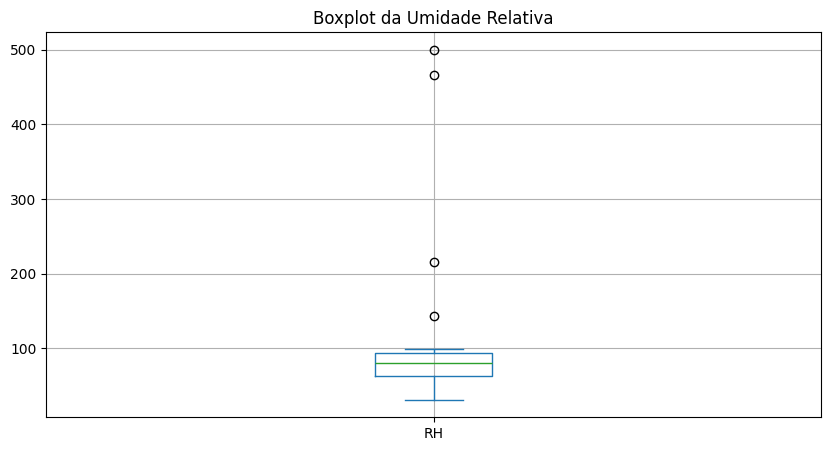

In [44]:
# Cria gráfico poxplot
df['RH'].plot.box(title='Boxplot da Umidade Relativa', figsize=(10, 5), grid=True)

### O retângulo é o quartil de 50%, pra baixo dele o de 25% e pra cima dele o de 75%. A linha verde é a mediana. As caudas são limites superior e inferior dos dados, limite de tolerância para outlier

In [45]:
# Definindo limites inferior e superior para detecção de outliers
lower_bound_rh = 0
upper_bound_rh = 100

print(f"Limites para detecção de outliers: {lower_bound_rh} e {upper_bound_rh}")

# Criando a máscara para detectar outliers
outliers_rh = (df['RH'] < lower_bound_rh) | (df['RH'] > upper_bound_rh)

# Exibindo os outliers
print("Outliers encontrados:")
print(df[outliers_rh])

Limites para detecção de outliers: 0 e 100
Outliers encontrados:
                             RH        TAMB  GHI
TS                                              
2024-07-08 06:09:00  142.500000   48.000000  0.0
2024-07-08 06:10:00  215.600006   88.000000  0.0
2024-07-08 06:11:00  466.600006  279.600006  0.0
2024-07-08 06:12:00  499.899994  465.100006  0.0


In [46]:
lower_bound_tamb = df['TAMB'].quantile(0.05) * 0.85 # Olha os 5% inferiores com tolerância de 15%
upper_bound_tamb = df['TAMB'].quantile(0.95) * 1.15 # Olha os 5% superiores com tolerância de 15%

print(f"Limites para detecção de outliers: {lower_bound_tamb} e {upper_bound_tamb}")

outiliers_tamb = (df['TAMB'] < lower_bound_tamb) | (df['TAMB'] > upper_bound_tamb)

print("Outliers encontrados:")
print(df[outiliers_tamb])

Limites para detecção de outliers: 17.595000648498534 e 36.91499824523925
Outliers encontrados:
                             RH        TAMB  GHI
TS                                              
2024-07-02 06:02:00   90.000000   17.500000 -0.5
2024-07-02 06:05:00   88.400002   16.900000 -0.5
2024-07-02 06:16:00   87.300003   17.100000 -0.5
2024-07-02 06:18:00   87.400002   17.200001 -0.5
2024-07-02 06:21:00   87.400002   17.100000 -0.5
...                         ...         ...  ...
2024-07-08 06:08:00   69.500000    7.200000  0.0
2024-07-08 06:09:00  142.500000   48.000000  0.0
2024-07-08 06:10:00  215.600006   88.000000  0.0
2024-07-08 06:11:00  466.600006  279.600006  0.0
2024-07-08 06:12:00  499.899994  465.100006  0.0

[6994 rows x 3 columns]


In [47]:
outliers_total = (outliers_rh | outiliers_tamb)

df_filtrado = df[~outliers_total] # Remove os outliers

df_filtrado

,RH,TAMB,GHI
TS,,,
2024-04-10 00:00:00,95.199997,24.900000,-1.0
2024-04-10 00:01:00,95.000000,24.900000,-1.0
2024-04-10 00:02:00,95.000000,24.900000,-0.5
2024-04-10 00:03:00,95.099998,24.900000,-0.5
2024-04-10 00:04:00,95.500000,24.900000,-0.5
...,...,...,...
2024-10-14 21:21:00,85.900002,23.799999,-0.5
2024-10-14 21:22:00,85.900002,23.799999,-0.5
2024-10-14 21:23:00,86.099998,23.799999,-0.5


In [48]:
df_filtrado.describe() # Estatísticas descritivas após remoção de outliers

,RH,TAMB,GHI
count,217789.000000,217789.000000,217789.000000
mean,76.711924,26.228395,241.226641
std,17.959184,3.480267,333.590027
min,30.900000,17.600000,-20.000000
25%,63.099998,23.600000,-0.500000
50%,80.800003,25.200001,3.500000
75%,93.300003,29.299999,450.500000
max,99.599998,34.700001,1417.500000


<Axes: title={'center': 'Série Temporal - Umidade Relativa (RH)'}, xlabel='TS'>

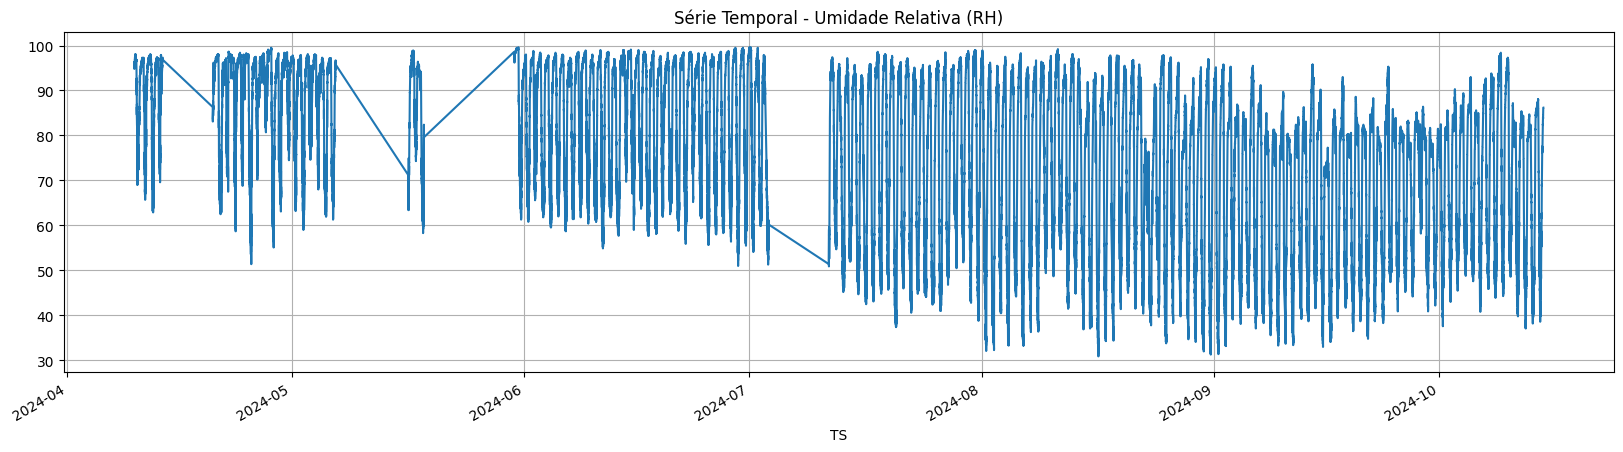

In [52]:
df_filtrado['RH'].plot(title='Série Temporal - Umidade Relativa (RH)', figsize=(20, 5), grid=True)